#### Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#### O presente arquivo é de sábado, 6 de junho. Atenção: pelo histório, existe uma inserção grande de registros nas segundas
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\INFLUD-08-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 error_bad_lines=False)

b'Skipping line 76847: expected 143 fields, saw 144\n'
b'Skipping line 93838: expected 143 fields, saw 145\n'
b'Skipping line 168040: expected 143 fields, saw 144\n'
b'Skipping line 229834: expected 143 fields, saw 144\n'
b'Skipping line 249189: expected 143 fields, saw 145\n'
c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0,2,60,62,63,64,109,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for k in (0,2,62,63,64,109,111): print (k, df.columns[k])

0 #NU_NOTIFIC
2 SEM_NOT
62 DT_DOSEUNI
63 DT_1_DOSE
64 DT_2_DOSE
109 FLUASU_OUT
111 FLUBLI_OUT


In [4]:
df.shape

(252610, 143)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252610 entries, 0 to 252609
Columns: 143 entries, #NU_NOTIFIC to PAC_DSCBO
dtypes: float64(89), object(54)
memory usage: 223.6+ MB


In [6]:
for par in enumerate(df.columns): print (par)

(0, '#NU_NOTIFIC')
(1, 'DT_NOTIFIC')
(2, 'SEM_NOT')
(3, 'DT_SIN_PRI')
(4, 'SEM_PRI')
(5, 'SG_UF_NOT')
(6, 'ID_REGIONA')
(7, 'CO_REGIONA')
(8, 'ID_MUNICIP')
(9, 'CO_MUN_NOT')
(10, 'ID_UNIDADE')
(11, 'CO_UNI_NOT')
(12, 'CS_SEXO')
(13, 'DT_NASC')
(14, 'NU_IDADE_N')
(15, 'TP_IDADE')
(16, 'COD_IDADE')
(17, 'CS_GESTANT')
(18, 'CS_RACA')
(19, 'CS_ETINIA')
(20, 'CS_ESCOL_N')
(21, 'ID_PAIS')
(22, 'CO_PAIS')
(23, 'SG_UF')
(24, 'ID_RG_RESI')
(25, 'CO_RG_RESI')
(26, 'ID_MN_RESI')
(27, 'CO_MUN_RES')
(28, 'CS_ZONA')
(29, 'SURTO_SG')
(30, 'NOSOCOMIAL')
(31, 'AVE_SUINO')
(32, 'FEBRE')
(33, 'TOSSE')
(34, 'GARGANTA')
(35, 'DISPNEIA')
(36, 'DESC_RESP')
(37, 'SATURACAO')
(38, 'DIARREIA')
(39, 'VOMITO')
(40, 'OUTRO_SIN')
(41, 'OUTRO_DES')
(42, 'PUERPERA')
(43, 'CARDIOPATI')
(44, 'HEMATOLOGI')
(45, 'SIND_DOWN')
(46, 'HEPATICA')
(47, 'ASMA')
(48, 'DIABETES')
(49, 'NEUROLOGIC')
(50, 'PNEUMOPATI')
(51, 'IMUNODEPRE')
(52, 'RENAL')
(53, 'OBESIDADE')
(54, 'OBES_IMC')
(55, 'OUT_MORBI')
(56, 'MORB_DESC')
(57, 'VACI

In [7]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [8]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['#NU_NOTIFIC'].dropna(inplace=True)

In [9]:
df.sample(10)

,#NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
4903,315880837098,28/04/2020 00:00:00,18.0,13/03/2020 00:00:00,11.0,GO,CENTRAL,1779.0,GOIANIA,520870.0,HOSPITAL DE ENFRENTAMENTO AO CORONAVIRUS DE GO...,86126.0,M,09/10/1949 00:00:00,70.0,3.0,3070.0,6.0,Parda,NaN,Ignorado,BRASIL,1.0,GO,CENTRAL,1779.0,GOIANIA,520870.0,1.0,2.0,2.0,9.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,NaN,2.0,04/04/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,14/04/2020 00:00:00,28/04/2020 00:00:00,NaN,28/04/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114891,315909024214,31/05/2020 00:00:00,23.0,21/05/2020 00:00:00,21.0,SP,GVE X OSASCO,1335.0,EMBU-GUACU,351510.0,UNIDADE MISTA DE SAUDE DE EMBUGUACU,2072033.0,F,10/07/1960 00:00:00,59.0,3.0,3059.0,6.0,Branca,NaN,Fund2,BRASIL,1.0,SP,GVE X OSASCO,1335.0,EMBU-GUACU,351510.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39813,315895548858,12/04/2020 00:00:00,16.0,09/03/2020 00:00:00,11.0,SP,GVE XXV SANTOS,1349.0,SANTOS,354850.0,SANTA CASA DE SANTOS,2025752.0,M,13/03/1953 00:00:00,67.0,3.0,3067.0,6.0,Ignorado,NaN,Ignorado,BRASIL,1.0,SP,GVE XXV SANTOS,1349.0,SANTOS,354850.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,NaN,2.0,18/03/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSTITUTO ADOLFO LUTZ SANTOS,2785544.0,4.0,NaN,1.0,1.0,13/03/2020 00:00:00,15/05/2020 00:00:00,NaN,15/05/2020 00:00:00,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166449,315886842031,29/04/2020 00:00:00,18.0,26/04/2020 00:00:00,18.0,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620.0,COMPLEXO HOSPITALAR SAO FRANCISCO,26840.0,M,16/03/1959 00:00:00,61.0,3.0,3061.0,6.0,Parda,NaN,Ignorado,BRASIL,1.0,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,NaN,3.0,30/04/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSTITUTO OTAVIO MAGALHAES LACEN MG,2695294.0,4.0,NaN,1.0,2.0,01/05/2020 00:00:00,28/05/2020 00:00:00,RESULTADO INCONCLUSIVO PARA COVID-19,05/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236251,315889596927,03/05/2020 00:00:00,19.0,23/04/2020 00:00:00,17.0,DF,NaN,NaN,BRASILIA,530010.0,HOSPITAL SANTA HELENA,3019608.0,F,24/10/1977 00:00:00,42.0,3.0,3042.0,6.0,Branca,NaN,Ignorado,BRASIL,1.0,DF,SUPERINTENDENCIA DE SAUDE NORTE,6262.0,SOBRADINHO II,539922.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,2.0,05/05/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,04/05/2020 00:00:00,08/05/2020 00:00:00,NaN,08/05/2020 00:00:00,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102814,315898259391,17/05/2020 00:00:00,21.0,08/05/2020 00:00:00,19.0,PI,4 GRS TERESINA,1883.0,TERESINA,221100.0,UNIDADE DE URGENCIA DE TERESINA PROF ZENON ROC...,5828856.0,M,15/12/1941 00:00:00,78.0,3.0,3078.0,6.0,Parda,NaN,Ignorado,BRASIL,1.0,PI,4 GRS TERESINA,1883.0,TERESINA,221100.0,1.0,9.0,9.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,9.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

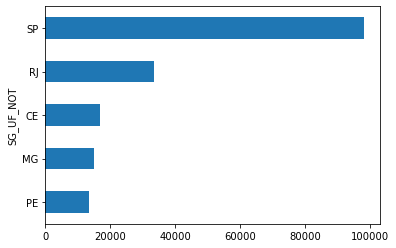

In [10]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

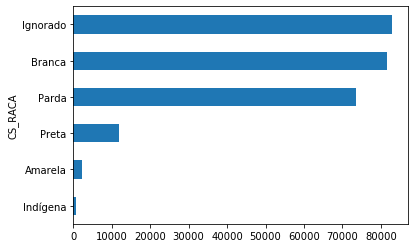

In [11]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [12]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena      571
Amarela      2182
Preta       11831
Parda       73605
Branca      81474
Ignorado    82947
dtype: int64

In [13]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         159161
Médio             25900
Fund1             22156
Fund2             14521
Superior          13594
Não se aplica     10576
Sem                6702
dtype: int64

In [14]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1.0    948
Name: HISTO_VGM, dtype: int64

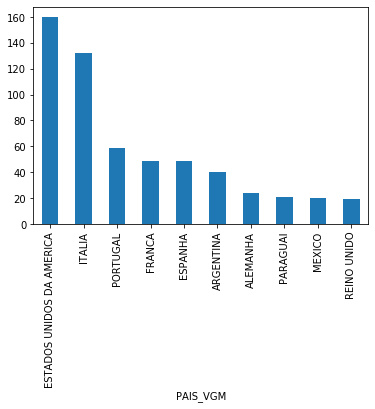

In [15]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')


In [16]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    73259
Name: CARDIOPATI, dtype: int64

In [17]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    52241
Name: DIABETES, dtype: int64

In [18]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    6738
Name: OBESIDADE, dtype: int64

In [19]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

117195

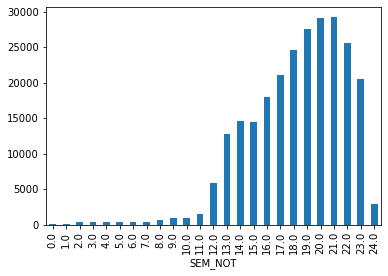

In [20]:
df.groupby('SEM_NOT').size().plot(kind='bar')

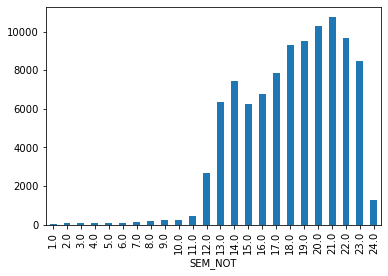

In [21]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

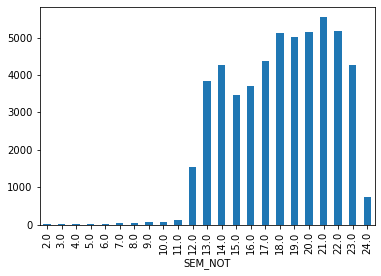

In [22]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')

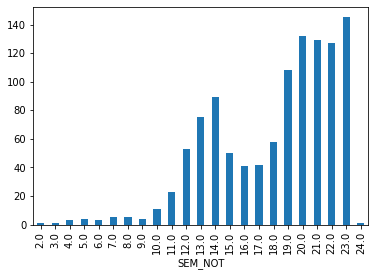

In [23]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')